In [1]:
import imgaug as ia
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt

In [2]:
ia.seed(1)

image = ia.quokka(size=(256, 256))
keypoints = ia.KeypointsOnImage([
    ia.Keypoint(x=65, y=100),
    ia.Keypoint(x=75, y=200),
    ia.Keypoint(x=100, y=100),
    ia.Keypoint(x=200, y=80)
], shape=image.shape)

In [3]:
seq = iaa.Sequential([
    iaa.Multiply((1.2, 1.5)), # change brightness, doesn't affect keypoints
    iaa.Affine(
        rotate=10,
        scale=(0.5, 0.7)
    ) # rotate by exactly 10deg and scale to 50-70%, affects keypoints
])

In [4]:
# Make our sequence deterministic.
# We can now apply it to the image and then to the keypoints and it will
# lead to the same augmentations.
# IMPORTANT: Call this once PER BATCH, otherwise you will always get the
# exactly same augmentations for every batch!
seq_det = seq.to_deterministic()

# Augment keypoints and images.
# As we only have one image and list of keypoints, we use
# [image] and [keypoints] to turn both into lists (batches) for the
# functions and then [0] to reverse that. In a real experiment, your
# variables would likely already be lists.
image_aug = seq_det.augment_images([image])[0]
keypoints_aug = seq_det.augment_keypoints([keypoints])[0]

In [5]:
# print coordinates before/after augmentation (see below)
# use after.x_int and after.y_int to get rounded integer coordinates
for i in range(len(keypoints.keypoints)):
    before = keypoints.keypoints[i]
    after = keypoints_aug.keypoints[i]
    print("Keypoint %d: (%.8f, %.8f) -> (%.8f, %.8f)" % (
        i, before.x, before.y, after.x, after.y)
    )

# image with keypoints before/after augmentation (shown below)
image_before = keypoints.draw_on_image(image, size=7)
image_after = keypoints_aug.draw_on_image(image_aug, size=7)

Keypoint 0: (65.00000000, 100.00000000) -> (94.11840007, 105.19555403)
Keypoint 1: (75.00000000, 200.00000000) -> (89.69884728, 164.11942850)
Keypoint 2: (100.00000000, 100.00000000) -> (114.38441167, 108.76899867)
Keypoint 3: (200.00000000, 80.00000000) -> (174.32927032, 107.39826243)


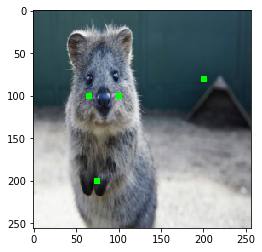

In [6]:
plt.imshow(image_before)

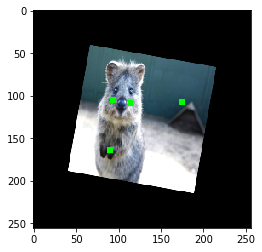

In [7]:
plt.imshow(image_after)